In [12]:
import pandas
from pathlib import Path
from glob import glob
from datetime import datetime

In [90]:
wb_id = '2917505'

In [60]:
output_path = 'output-data/results/full'

In [61]:
files = glob(f'{output_path}/*flowveldepth.csv')

In [73]:
dat = {}
dfs = []
for file in files:
    df = pandas.read_csv(file, header=0,
                         dtype={'id': int},
                         names=['id', 'q', 'v', 'd', 'ndg'])
    dt = datetime.strptime(Path(file).name.split('.')[0], '%Y%m%d%H%M')
    df['dt'] = dt
    dfs.append(df)

In [74]:
df_all = pandas.concat(dfs)

In [91]:
dat = df_all.loc[df['id'] == int(wb_id)]
dat.set_index('dt', inplace=True)
dat.sort_index(inplace=True)

/var/folders/6l/9spwppmn3gxfld10q9_szx5h0000gp/T/ipykernel_18631/2396015454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat.sort_index(inplace=True)


Text(0, 0.5, 'Q [CFS]')

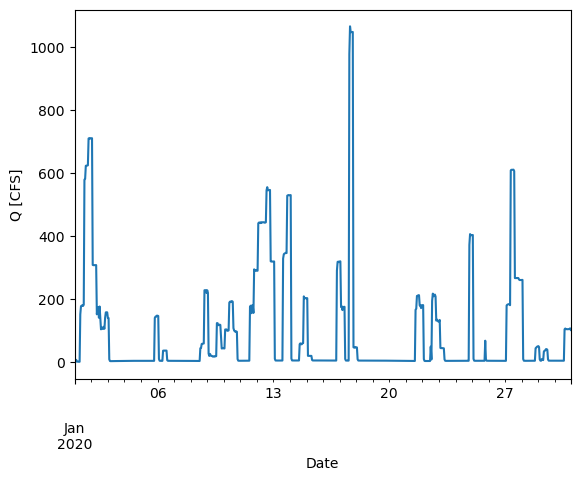

In [94]:
ax = dat.d.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Q [CFS]')

In [87]:
ax

<Axes: xlabel='dt'>